<a href="https://colab.research.google.com/github/ole3649245/Assignment3-SrisanNatthawan/blob/main/Improveassignment2SraisanNatthawan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import zipfile
import os

#upload ZIP
uploaded = files.upload()

#ZIP
for file_name in uploaded.keys():
    if file_name.endswith('.zip'):
        with zipfile.ZipFile(file_name, 'r') as zip_ref:
            zip_ref.extractall()
            print(f"Extracted: {file_name}")


print(os.listdir("."))

Saving archive (1).zip to archive (1).zip
Extracted: archive (1).zip
['.config', 'train_energy_data.csv', 'test_energy_data.csv', 'archive (1).zip', 'sample_data']


In [2]:
import pandas as pd

#CSV
train_data = pd.read_csv('train_energy_data.csv')
print("Train Data:")
print(train_data.head())

test_data = pd.read_csv('test_energy_data.csv')
print("\nTest Data:")
print(test_data.head())

Train Data:
  Building Type  Square Footage  Number of Occupants  Appliances Used  \
0   Residential            7063                   76               10   
1    Commercial           44372                   66               45   
2    Industrial           19255                   37               17   
3   Residential           13265                   14               41   
4    Commercial           13375                   26               18   

   Average Temperature Day of Week  Energy Consumption  
0                29.84     Weekday             2713.95  
1                16.72     Weekday             5744.99  
2                14.30     Weekend             4101.24  
3                32.82     Weekday             3009.14  
4                11.92     Weekday             3279.17  

Test Data:
  Building Type  Square Footage  Number of Occupants  Appliances Used  \
0   Residential           24563                   15                4   
1    Commercial           27583                  

In [4]:
#dowload
import pandas as pd
from sklearn.preprocessing import LabelEncoder

train_data = pd.read_csv('train_energy_data.csv')  # ข้อมูลการฝึก
test_data = pd.read_csv('test_energy_data.csv')  # ข้อมูลการทดสอบ

# build X and y
X_train = train_data.drop(columns=['Energy Consumption'])
y_train = train_data['Energy Consumption']

X_test = test_data.drop(columns=['Energy Consumption'])
y_test = test_data['Energy Consumption']

#check column Building Type and Day of Week
print(X_train.columns)

# trans Building Type and Day of Week by LabelEncoder
le_building = LabelEncoder()
le_day = LabelEncoder()

X_train['Building Type'] = le_building.fit_transform(X_train['Building Type'])
X_train['Day of Week'] = le_day.fit_transform(X_train['Day of Week'])

X_test['Building Type'] = le_building.transform(X_test['Building Type'])
X_test['Day of Week'] = le_day.transform(X_test['Day of Week'])

Index(['Building Type', 'Square Footage', 'Number of Occupants',
       'Appliances Used', 'Average Temperature', 'Day of Week'],
      dtype='object')


In [5]:
print(X_train.head())  # check X_train
print(X_test.head())   # check X_test

   Building Type  Square Footage  Number of Occupants  Appliances Used  \
0              2            7063                   76               10   
1              0           44372                   66               45   
2              1           19255                   37               17   
3              2           13265                   14               41   
4              0           13375                   26               18   

   Average Temperature  Day of Week  
0                29.84            0  
1                16.72            0  
2                14.30            1  
3                32.82            0  
4                11.92            0  
   Building Type  Square Footage  Number of Occupants  Appliances Used  \
0              2           24563                   15                4   
1              0           27583                   56               23   
2              0           45313                    4               44   
3              2           4162

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [7]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 127509.76507879267


In [9]:
# new featuee เช่น Appliances per Occupant
X_train['Appliances per Occupant'] = X_train['Appliances Used'] / X_train['Number of Occupants']
X_test['Appliances per Occupant'] = X_test['Appliances Used'] / X_test['Number of Occupants']

# check featuew for Target
print(X_train.head())

   Building Type  Square Footage  Number of Occupants  Appliances Used  \
0              2            7063                   76               10   
1              0           44372                   66               45   
2              1           19255                   37               17   
3              2           13265                   14               41   
4              0           13375                   26               18   

   Average Temperature  Day of Week  Appliances per Occupant  
0                29.84            0                 0.131579  
1                16.72            0                 0.681818  
2                14.30            1                 0.459459  
3                32.82            0                 2.928571  
4                11.92            0                 0.692308  


In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf}")

Random Forest MSE: 14999.20055143322


In [12]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f"Gradient Boosting MSE: {mse_gb}")

Gradient Boosting MSE: 6295.441557800637


In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}


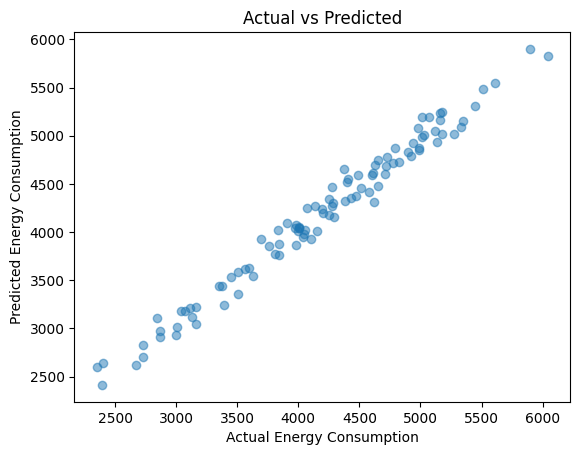

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})  # เปลี่ยน y_pred_rf ตามโมเดลที่ใช้
plt.scatter(results['Actual'], results['Predicted'], alpha=0.5)
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title("Actual vs Predicted")
plt.show()

In [15]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_rf)
print(f"R-squared: {r2}")

R-squared: 0.9781424242918136


In [17]:
# Feature Importance for Random Forest
import pandas as pd
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(feature_importance)

                   Feature  Importance
1           Square Footage    0.625204
0            Building Type    0.179214
2      Number of Occupants    0.089485
3          Appliances Used    0.088750
6  Appliances per Occupant    0.010296
4      Average Temperature    0.005976
5              Day of Week    0.001074


In [19]:
#add new feature
X_train['Occupants per Square Foot'] = X_train['Number of Occupants'] / X_train['Square Footage']
X_test['Occupants per Square Foot'] = X_test['Number of Occupants'] / X_test['Square Footage']

In [20]:
from xgboost import XGBRegressor

# build XGBoost
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# predict result R-squared
y_pred_xgb = xgb_model.predict(X_test)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"R-squared (XGBoost): {r2_xgb}")

R-squared (XGBoost): 0.9826567894465242


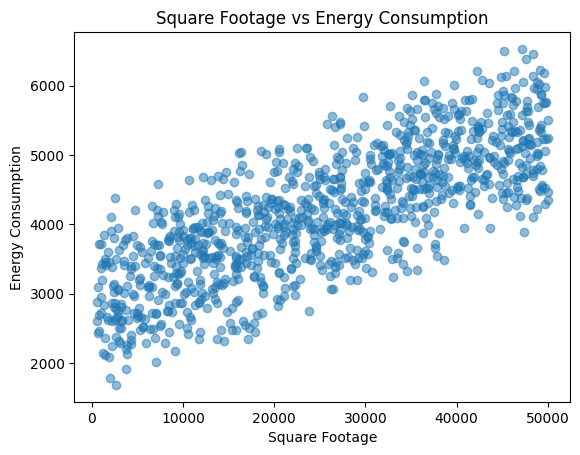

In [21]:
import matplotlib.pyplot as plt #graph

plt.scatter(X_train['Square Footage'], y_train, alpha=0.5)
plt.xlabel('Square Footage')
plt.ylabel('Energy Consumption')
plt.title('Square Footage vs Energy Consumption')
plt.show()

In [22]:
correlation = X_train['Square Footage'].corr(y_train)
print(f"Correlation between Square Footage and Energy Consumption: {correlation}")

Correlation between Square Footage and Energy Consumption: 0.774872594798946


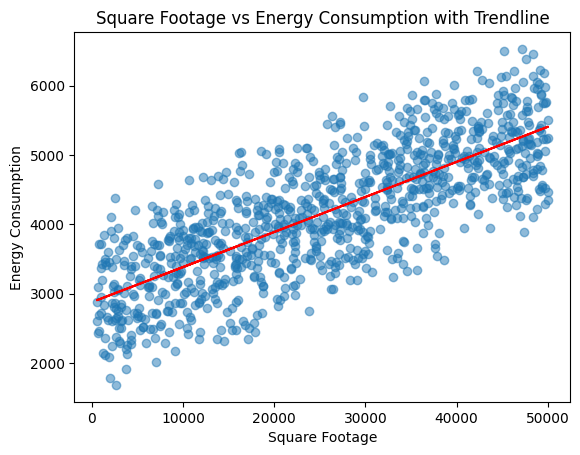

In [23]:
import numpy as np

# line
z = np.polyfit(X_train['Square Footage'], y_train, 1)
p = np.poly1d(z)

# show graph
plt.scatter(X_train['Square Footage'], y_train, alpha=0.5)
plt.plot(X_train['Square Footage'], p(X_train['Square Footage']), color='red')
plt.xlabel('Square Footage')
plt.ylabel('Energy Consumption')
plt.title('Square Footage vs Energy Consumption with Trendline')
plt.show()

In [24]:
#new feature
X_train['Occupants per Square Foot'] = X_train['Number of Occupants'] / X_train['Square Footage']
X_test['Occupants per Square Foot'] = X_test['Number of Occupants'] / X_test['Square Footage']

#check relation
correlation = X_train['Occupants per Square Foot'].corr(y_train)
print(f"Correlation between Occupants per Square Foot and Energy Consumption: {correlation}")

Correlation between Occupants per Square Foot and Energy Consumption: -0.28032941104049297


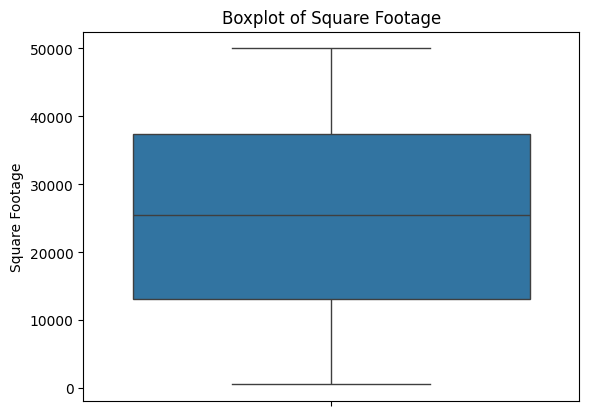

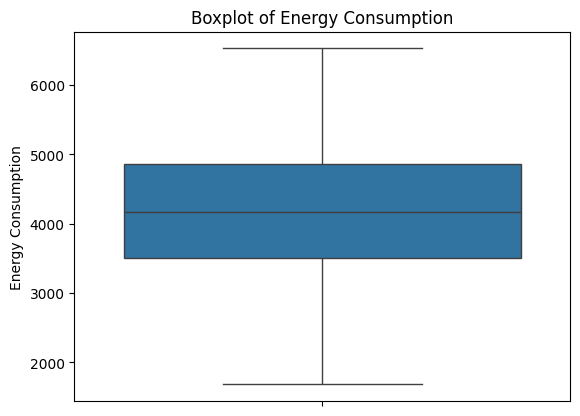

In [25]:
import seaborn as sns

# Boxplot
sns.boxplot(X_train['Square Footage'])
plt.title('Boxplot of Square Footage')
plt.show()

sns.boxplot(y_train)
plt.title('Boxplot of Energy Consumption')
plt.show()

In [26]:
#single feature model
X_train_single = X_train[['Square Footage']]
X_test_single = X_test[['Square Footage']]

model.fit(X_train_single, y_train)
y_pred_single = model.predict(X_test_single)

#caculate R-squared
r2_single = r2_score(y_test, y_pred_single)
print(f"R-squared with Single Feature (Square Footage): {r2_single}")

R-squared with Single Feature (Square Footage): 0.5123192151126718


In [27]:
results.to_csv('results.csv', index=False)
from google.colab import files
files.download('results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
plt.savefig('graph.png')
files.download('graph.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>